In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='white', palette='deep')
width = 0.35
%matplotlib notebook

/kaggle/input/titanic3/titanic3.xls


# Trivials Functions

In [2]:
def autolabel(rects,ax, df): #autolabel
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{} ({:.2f}%)'.format(height, height*100/df.shape[0]),
                    xy = (rect.get_x() + rect.get_width()/2, height),
                    xytext= (0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')
def autolabel_without_pct(rects,ax, df): #autolabel
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy = (rect.get_x() + rect.get_width()/2, height+5),
                    xytext= (0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')
def autolabel_horizontal(rects,ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        width = rect.get_width()
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_y() + rect.get_height()/2.,
                '%.2f' % width,
                ha='center', va='center', color='black')    

# Importing Dataset

In [3]:
df = pd.read_excel('/kaggle/input/titanic3/titanic3.xls')

# Renaming Embarked Values

In [4]:
letters = np.array([])
embarked = ['Cherbourg', 'Queenstown', 'Southampton']
for i in df['embarked']:
    if i == 'S':
        letters = np.append(letters, embarked[2])
    elif i == 'C':
        letters = np.append(letters, embarked[0])
    else:
        letters= np.append(letters, embarked[1])

df['embarked'] = letters      

# Dataset Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1309 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [6]:
# Replace columns
new_columns = {'sibsp':'sibling','parch': 'parents', 'home.dest': 'destination'}
df = df.rename(columns= new_columns)
print('How many peoples embarked from Cherbourg, Queenstown, and Southampton')
print('-'*100)
print('{} embarked from Cherbourg'.format(len(df[df['embarked']=='Cherbourg'])))
print('{} embarked from Queenstown'.format(len(df[df['embarked']=='Queenstown'])))
print('{} embarked from Southampton'.format(len(df[df['embarked']=='Southampton'])))

How many peoples embarked from Cherbourg, Queenstown, and Southampton
----------------------------------------------------------------------------------------------------
270 embarked from Cherbourg
125 embarked from Queenstown
914 embarked from Southampton


In [7]:
survived = df[df['survived']==1]
not_survided = df[df['survived']==0]
total_passenger = len(df.survived)
print('How was the percentage of survived?')
print('-'*100)
print('The percentage of survived was: {:.2f}%'.format((len(survived)/total_passenger)*100))
print('The percentage of not survived was:{:.2f}%'.format((len(not_survided)/total_passenger)*100))

How was the percentage of survived?
----------------------------------------------------------------------------------------------------
The percentage of survived was: 38.20%
The percentage of not survived was:61.80%


In [8]:
max_name = np.array([])
min_name = np.array([])
max_name_value = np.array([])
min_name_value = np.array([])
n=0
for i in df.loc[:,['age','fare']]:
    max_name = np.append(max_name, df['name'][df[i].idxmax()])
    max_name_value = np.append(max_name_value, max(df[i]))
    min_name = np.append(min_name, df['name'][df[i].idxmin()])
    min_name_value = np.append(min_name_value, min(df[i]))
    print('The person who had the maximum {} was {} with {}'.format(i, max_name[n],max_name_value[n]))
    print('-'*100)
    print('The person who had the minimum {} was {} with {}'.format(i,min_name[n],min_name_value[n]))
    print('-'*100)
    n=+1

woman = df[df['sex']=='female'].dropna(axis=1)
men = df[df['sex']=='male'].dropna(axis=1)
print('How many male and female embarked?')
print('-'*100)
print('Total of female embarked on Titanic was {}'.format(len(woman)))
print('Total of male embarked on Titanic was {}'.format(len(men)))

The person who had the maximum age was Barkworth, Mr. Algernon Henry Wilson with 80.0
----------------------------------------------------------------------------------------------------
The person who had the minimum age was Dean, Miss. Elizabeth Gladys "Millvina" with 0.1667
----------------------------------------------------------------------------------------------------
The person who had the maximum fare was Cardeza, Mr. Thomas Drake Martinez with 512.3292
----------------------------------------------------------------------------------------------------
The person who had the minimum fare was Andrews, Mr. Thomas Jr with 0.0
----------------------------------------------------------------------------------------------------
How many male and female embarked?
----------------------------------------------------------------------------------------------------
Total of female embarked on Titanic was 466
Total of male embarked on Titanic was 843


In [9]:
print("How many bodies were recovered?")
print('-'*100)
print('The total of deaths was {}. But only {} were recovered.'.format(len(not_survided), df['body'].count()))

How many bodies were recovered?
----------------------------------------------------------------------------------------------------
The total of deaths was 809. But only 121 were recovered.


# Plot

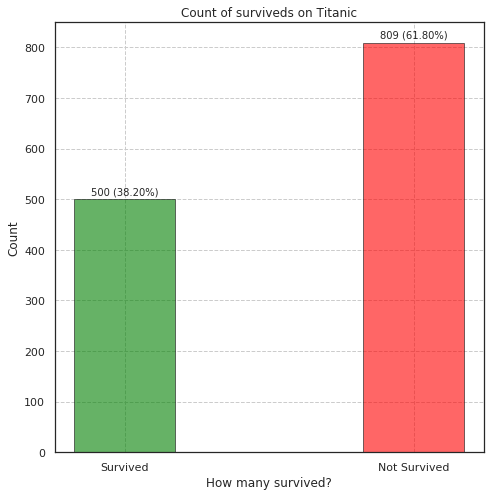

In [10]:
#Plot survived
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.set_title('Count of surviveds on Titanic')
rects1= ax.bar('Survived', len(survived['survived']), width,color='green', alpha=0.6, edgecolor='k', label='Survived')
rects2= ax.bar('Not Survived', len(not_survided['survived']), width,color='red', alpha=0.6, edgecolor='k', label='Not Survived')
ax.grid(b=True, which='major', linestyle='--')
ax.set_xlabel('How many survived?')
ax.set_ylabel('Count')
autolabel(rects1, ax, df)
autolabel(rects2, ax, df)
plt.tight_layout()

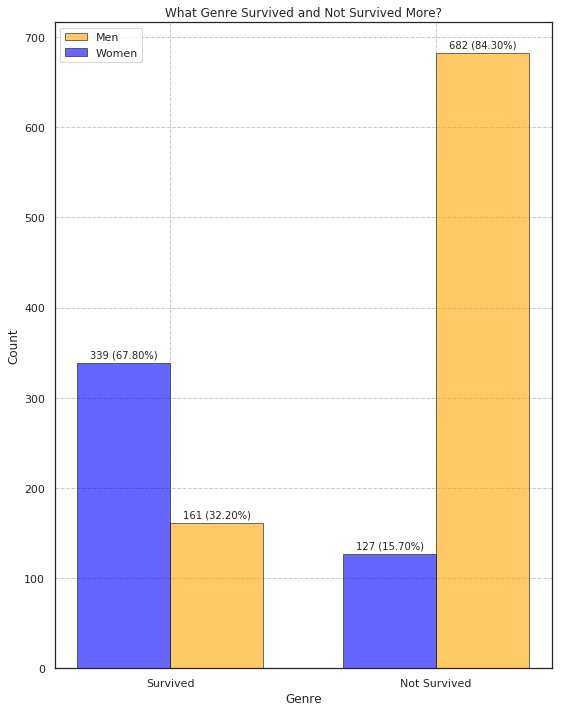

In [11]:
#Plot what genre survived and not survided more?
survived_male = survived['survived'][survived['sex'] == 'male']
survived_female = survived['survived'][survived['sex'] == 'female']
not_survived_male = not_survided['survived'][not_survided['sex']=='male']
not_survived_female = not_survided['survived'][not_survided['sex']=='female']
label = ['Survived', 'Not Survived']
ind = np.arange(len(label))
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1)
rects3 = ax.bar(ind[0]+width/2,survived_male.shape[0],width, alpha=.6, color= 'orange', edgecolor='k', label='Men' )
rects4 = ax.bar(ind[0]-width/2, survived_female.shape[0],width, alpha=.6, color= 'blue', edgecolor='k', label='Women' )
rects5 = ax.bar(ind[1]+width/2, not_survived_male.shape[0], width, alpha=.6, edgecolor='k',  color='orange')
rects6 = ax.bar(ind[1]-width/2, not_survived_female.shape[0], width, alpha=.6, edgecolor='k', color='blue')
ax.set_xticks(ind)
ax.set_title('What Genre Survived and Not Survived More?')
ax.set_xlabel('Genre')
ax.set_ylabel('Count')
ax.set_xticklabels(label)
ax.legend(loc='best')
ax.grid(b=True, which='major', linestyle='--')
autolabel(rects3, ax,survived)
autolabel(rects4, ax,survived)
autolabel(rects5, ax,not_survided)
autolabel(rects6, ax,not_survided)
plt.tight_layout()

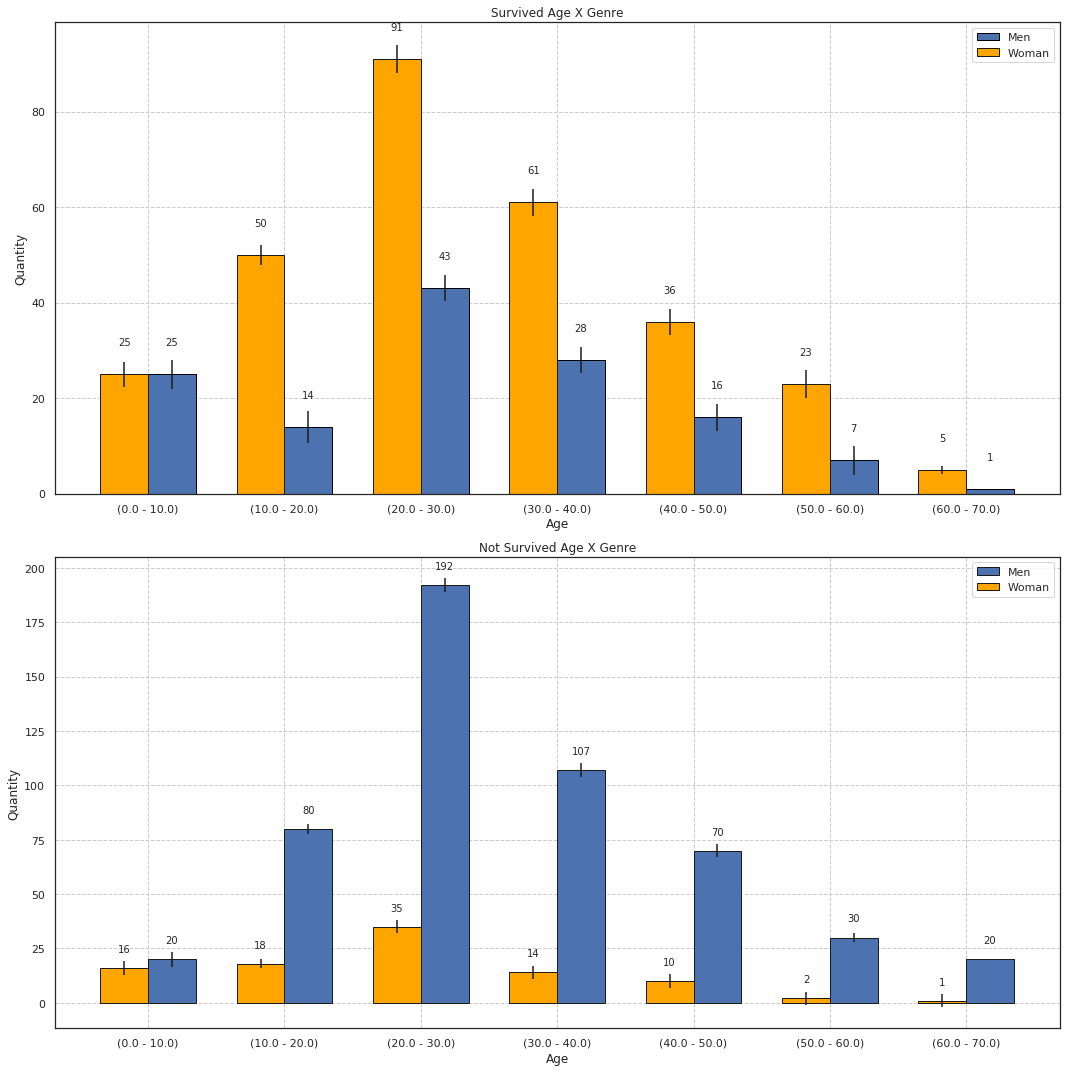

In [12]:
#plot age
bins = np.arange(min(df['age']), max(df['age']),10).round()
bins2 = bins.astype(str)
n = 0
m = 1
ranged = np.array([])
while m < 8:
    ranged = np.append(ranged, '('+bins2[n] + ' - ' + bins2[m]+')')
    n+=1
    m+=1
ranged
male_survived_age = survived.groupby(pd.cut(survived['age'], bins))['sex'].value_counts().values[1::2]
male_survived_std = survived.groupby([pd.cut(survived['age'], bins), 'sex'])['age'].std().values[1::2]
male_survived_mean = survived.groupby([pd.cut(survived['age'], bins), 'sex'])['age'].mean().values[1::2]
female_survived_age = survived.groupby(pd.cut(survived['age'], bins))['sex'].value_counts().values[::2]
female_survived_std = survived.groupby([pd.cut(survived['age'], bins), 'sex'])['age'].std().values[::2]
female_survived_mean = survived.groupby([pd.cut(survived['age'], bins), 'sex'])['age'].mean().values[::2]
male_not_survived_age = not_survided.groupby(pd.cut(not_survided['age'], bins))['sex'].value_counts().values[::2]
male_not_survived_std = not_survided.groupby([pd.cut(not_survided['age'], bins), 'sex'])['age'].std().values[::2]
male_not_survived_mean = not_survided.groupby([pd.cut(not_survided['age'], bins), 'sex'])['age'].mean().values[::2]
female_not_survived_age = not_survided.groupby(pd.cut(not_survided['age'], bins))['sex'].value_counts().values[1::2]
female_not_survived_std = not_survided.groupby([pd.cut(not_survided['age'], bins), 'sex'])['age'].std().values[1::2]
female_not_survived_mean = not_survided.groupby([pd.cut(not_survided['age'], bins), 'sex'])['age'].mean().values[1::2]
ind=np.arange(len(ranged))
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,1,1)
rects7 = ax.bar(ind+width/2,male_survived_age,width, edgecolor='black', label='Men', yerr=male_survived_std)
rects8 = ax.bar(ind-width/2,female_survived_age,width,color='orange', edgecolor='k', label='Woman', yerr=female_survived_std)
ax.set_title('Survived Age X Genre')
ax.grid(b=True, which='major', linestyle='--')
ax.set_xticks(ind)
ax.set_xlabel('Age')
ax.set_ylabel('Quantity')
ax.set_xticklabels(ranged)
ax.legend(loc='best')
ax2 = fig.add_subplot(2,1,2)
rects9 = ax2.bar(ind+width/2,male_not_survived_age,width,edgecolor='k', label='Men', yerr=male_not_survived_std)
rects10 =ax2.bar(ind-width/2,female_not_survived_age,width,color='orange', edgecolor='k', label='Woman', yerr=female_not_survived_std)
ax2.set_title('Not Survived Age X Genre')
ax2.grid(b=True, which='major', linestyle='--')
ax2.set_xticks(ind)
ax2.set_xlabel('Age')
ax2.set_ylabel('Quantity')
ax2.set_xticklabels(ranged)
ax2.legend(loc='best')
autolabel_without_pct(rects7,ax, survived)
autolabel_without_pct(rects8,ax, survived)
autolabel_without_pct(rects9,ax2, not_survided)
autolabel_without_pct(rects10, ax2, not_survided)
plt.tight_layout()

There were 582.00 families on Titanic
The Sage Family is the greater family of Titanic with 11.00 relatives.


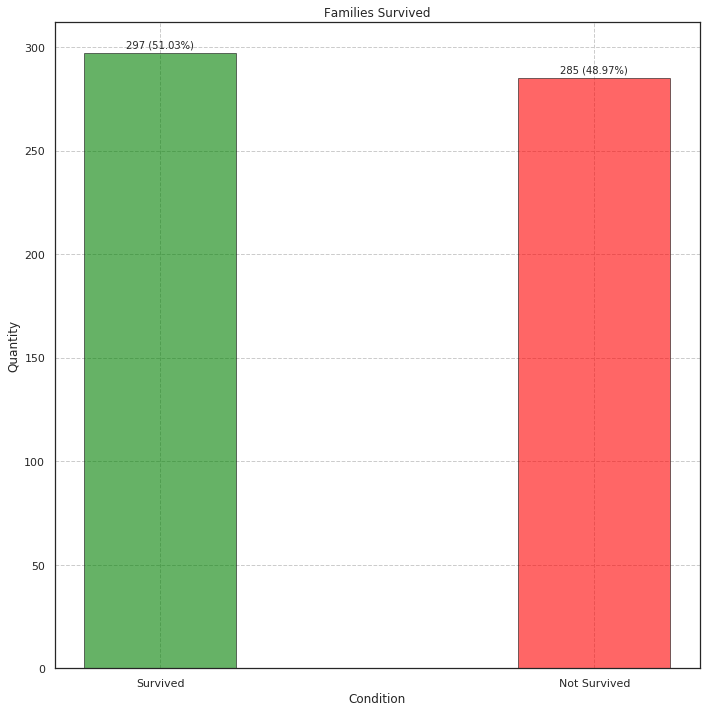

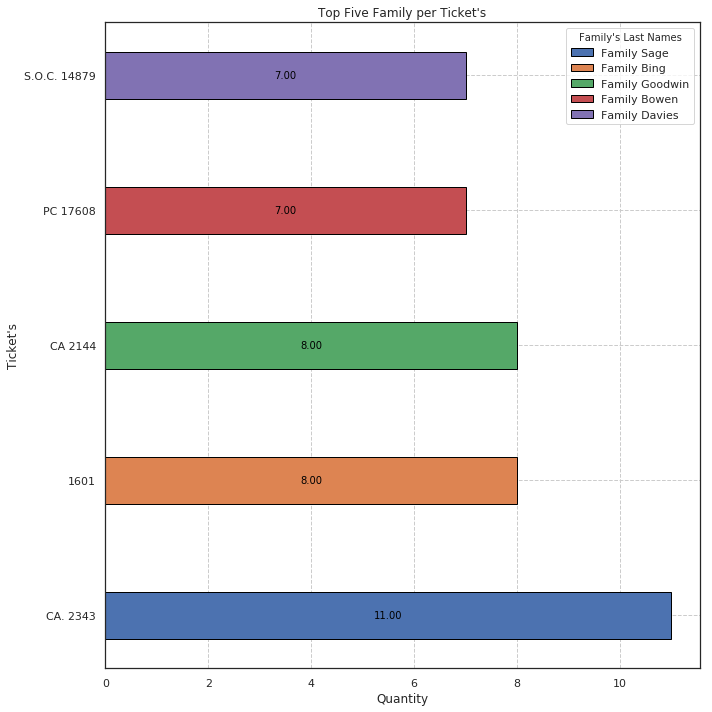

In [13]:
# Family
from collections import Counter
c = Counter(df['ticket'])

ticket={}
for i in c:
    if c[i] > 1:
        ticket[i] = c[i]
tickets_names = [i for i in ticket]

df_family = pd.DataFrame()
df_family1 = pd.DataFrame()

for i in tickets_names:
    df_family1 = pd.DataFrame(df.loc[df['ticket']==i])
    df_family = pd.concat([df_family1,df_family])
print('There were {:.2f} families on Titanic'.format(len(df_family))) 
df_family_survived = df_family[df_family['survived']==1]
df_family_not_survived = df_family[df_family['survived']==0]
fig= plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_title('Families Survived')
ax.set_ylabel('Quantity')
ax.set_xlabel('Condition')
ax.grid(b=True, which='major', linestyle='--')
rects11= ax.bar('Survived', len(df_family_survived), width,color='green', alpha=0.6, edgecolor='k', label='Survived')
rects12= ax.bar('Not Survived', len(df_family_not_survived), width,color='red', alpha=0.6, edgecolor='k', label='Not Survived')
autolabel(rects11,ax,df_family)
autolabel(rects12,ax,df_family)
plt.tight_layout()

grouped_family = df_family.groupby('ticket')['name'].count().sort_values(ascending=False).head()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
for i in range(0,len(grouped_family)):
    last_name = df_family[df_family['ticket']==grouped_family.index[i]]['name'].values[0].split(',')[0]
    rects13=ax.barh(grouped_family.index[i],grouped_family.values[i], width,label='Family '+last_name, edgecolor='black')
    autolabel_horizontal(rects13,ax)
ax.set_title("Top Five Family per Ticket's")
ax.legend(loc='best', title=("Family's Last Names"))
ax.set_xlabel('Quantity')
ax.set_ylabel("Ticket's")
ax.grid(b=True, which='major', linestyle='--')
plt.tight_layout()

sage = df_family[df_family['ticket']==grouped_family.index[0]]['name'].values[0].split(',')[0]
print('The {} Family is the greater family of Titanic with {:.2f} relatives.'.format(sage,len(df_family[df_family['ticket']==grouped_family.index[0]]['name'])))

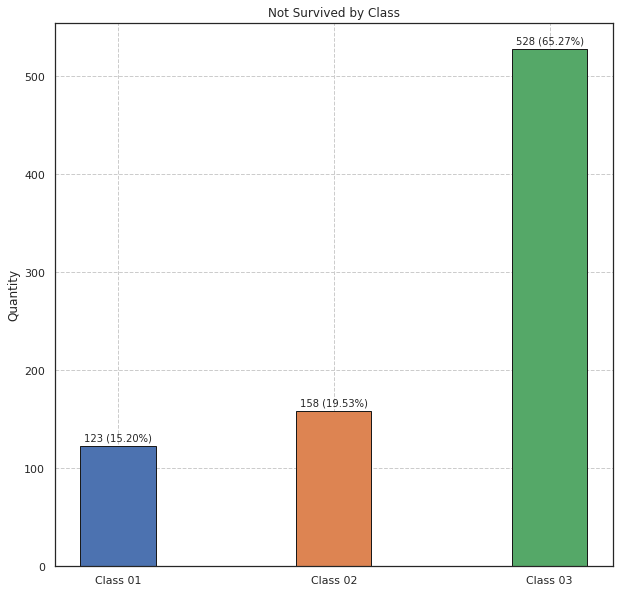

In [14]:
# Class
class_1 = not_survided[not_survided['pclass'] ==1]
class_2 = not_survided[not_survided['pclass'] ==2]   
class_3 = not_survided[not_survided['pclass'] ==3]

fig= plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_title('Not Survived by Class')
rects14 = ax.bar('Class 01', len(class_1['pclass']==1), width,edgecolor='k', label='01' )
rects15 = ax.bar('Class 02', len(class_2['pclass']==2), width,edgecolor='k', label='02' )
rects16 = ax.bar('Class 03', len(class_3['pclass']==3), width,edgecolor='k', label='03' )
ax.grid(b=True, which='major', linestyle='--')
ax.set_ylabel('Quantity')
autolabel(rects14,ax,not_survided)
autolabel(rects15,ax,not_survided)
autolabel(rects16,ax,not_survided)

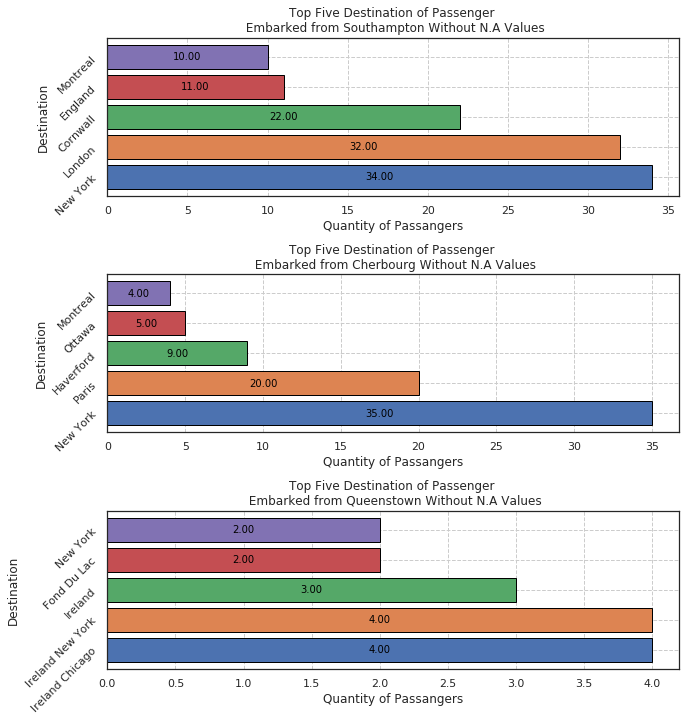

In [15]:
#Destination
import re
def clean_strings(strings):
    result = []
    for value in strings:
        value = value.strip()
        value = re.sub('[!#?/]', '', value)
        value = value.title()
        result.append(value)
    return result
destination = df.dropna(subset=['destination'])
destination['destination'] = destination['destination'].apply(lambda x: x.split(',')[0])
destination['destination'] = destination['destination'].apply(lambda x: x.split('/')[0])
destination['destination'] = clean_strings(destination['destination'])
destination_southampton = destination[destination['embarked']=='Southampton']   
destination_cherbourg = destination[destination['embarked']=='Cherbourg']  
destination_queens = destination[destination['embarked']=='Queenstown']
  
c_southampton = Counter(destination_southampton['destination'])
c_cherbourg = Counter(destination_cherbourg['destination'])
c_queens = Counter(destination_queens['destination'])
c_southampton = {k: v for k, v in sorted(c_southampton.items(), key=lambda item: item[1], reverse=True)}
c_cherbourg = {k: v for k, v in sorted(c_cherbourg.items(), key=lambda item: item[1], reverse=True)}
c_queens = {k: v for k, v in sorted(c_queens.items(), key=lambda item: item[1],reverse=True)}
    
c_southampton_five = {}
c_cherbourg_five = {}
c_queens_five = {}    
count = 0
while count < 5:
    c_southampton_five[list(c_southampton.keys())[count]] = c_southampton[list(c_southampton.keys())[count]]
    c_cherbourg_five[list(c_cherbourg.keys())[count]] = c_cherbourg[list(c_cherbourg.keys())[count]]
    c_queens_five[list(c_queens.keys())[count]] = c_queens[list(c_queens.keys())[count]] 
    count+=1

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.set_title('Top Five Destination of Passenger \n Embarked from Southampton Without N.A Values')
ax2.set_title('Top Five Destination of Passenger \n Embarked from Cherbourg Without N.A Values')
ax3.set_title('Top Five Destination of Passenger \n Embarked from Queenstown Without N.A Values')
for i in range(0,len(c_southampton_five)):
    rects17 = ax1.barh(list(c_southampton_five.keys())[i], list(c_southampton_five.values())[i], edgecolor='black')
    rects18 = ax2.barh(list(c_cherbourg_five.keys())[i], list(c_cherbourg_five.values())[i], edgecolor='black')
    rects19 = ax3.barh(list(c_queens_five.keys())[i], list(c_queens_five.values())[i], edgecolor='black')
    ax1.grid(b=True, which='major', linestyle='--')
    ax2.grid(b=True, which='major', linestyle='--')
    ax3.grid(b=True, which='major', linestyle='--')
    ax1.set_xlabel('Quantity of Passangers')
    ax2.set_xlabel('Quantity of Passangers')
    ax3.set_xlabel('Quantity of Passangers')
    ax1.set_ylabel('Destination')
    ax2.set_ylabel('Destination')
    ax3.set_ylabel('Destination')    
    autolabel_horizontal(rects17,ax1)
    autolabel_horizontal(rects18,ax2)
    autolabel_horizontal(rects19,ax3)
    plt.tight_layout()
for tick in ax1.get_yticklabels():
    tick.set_rotation(45)
for tick in ax2.get_yticklabels():
    tick.set_rotation(45)
for tick in ax3.get_yticklabels():
    tick.set_rotation(45)

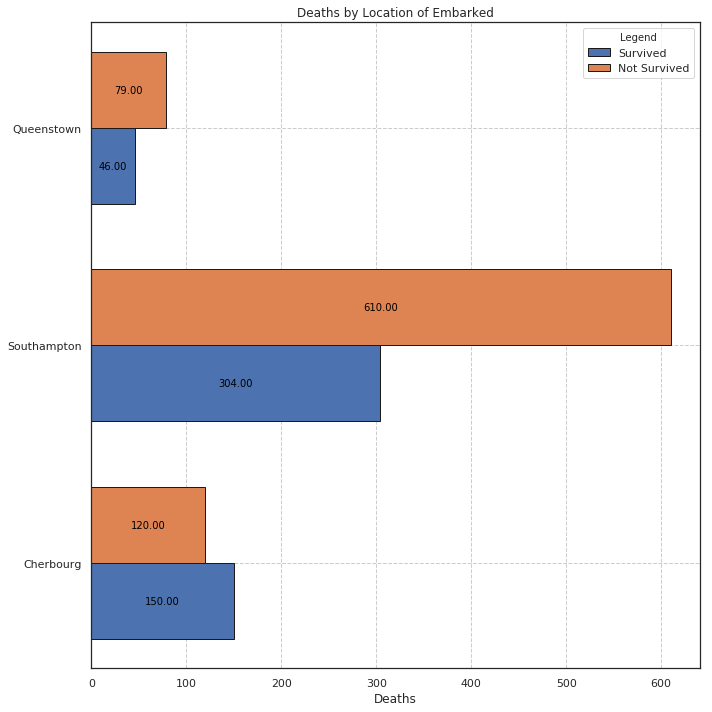

In [16]:
labels = ['Cherbourg','Southampton', 'Queenstown']
destination_survived = np.array([])
destination_not_survived = np.array([])
for i in labels:
    survived_list = len(df[(df['survived']==1)][df['embarked']==i]['survived'])
    not_survived_list = len(df[(df['survived']==0)][df['embarked']==i]['survived'])
    destination_survived = np.append(destination_survived,survived_list)
    destination_not_survived = np.append(destination_not_survived,not_survived_list)
ind = np.arange(len(labels))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
rects20 = ax.barh(ind-width/2, destination_survived, width, edgecolor='k',align='center', label='Survived')
rects21 = ax.barh(ind+width/2, destination_not_survived, width, edgecolor='k', align='center', label='Not Survived')
ax.legend(loc='best', title='Legend')
ax.grid(b=True, which='major', linestyle='--')
ax.set_yticks(ind)
ax.set_yticklabels(labels)
ax.set_xlabel('Deaths')
ax.set_title('Deaths by Location of Embarked')
autolabel_horizontal(rects20,ax)
autolabel_horizontal(rects21,ax)
plt.tight_layout()

# Feature Engineering

In [17]:
df_feature = df.copy()
describe = df_feature.describe()
info = df_feature.info()
df_feature = df_feature.drop(['cabin','boat', 'body', 'destination'], axis=1)
    
list_family = np.array([])
for i in df_feature['ticket']:
    for j in c:
        if i == j:
            list_family = np.append(list_family, c[j])
            
df_feature['family']=list_family  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass         1309 non-null int64
survived       1309 non-null int64
name           1309 non-null object
sex            1309 non-null object
age            1046 non-null float64
sibling        1309 non-null int64
parents        1309 non-null int64
ticket         1309 non-null object
fare           1308 non-null float64
cabin          295 non-null object
embarked       1309 non-null object
boat           486 non-null object
body           121 non-null float64
destination    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


# Looking for null values

In [18]:
df_feature.isnull().sum() #first way
df_feature.isnull().any() #second way
df_feature.isna().sum() #third way
null_percentage = (df_feature.isnull().sum()/len(df_feature)*100)
null_percentage = pd.DataFrame(null_percentage, columns=['% Null Values'])
null_percentage

,% Null Values
pclass,0.000000
survived,0.000000
name,0.000000
sex,0.000000
age,20.091673
sibling,0.000000
parents,0.000000
ticket,0.000000
fare,0.076394
embarked,0.000000


# Filling null Values

In [19]:
df_feature['age'].fillna(df_feature['age'].mean(), inplace=True)
df_feature['fare'].fillna(method='ffill', inplace=True)

# Define X and Y

In [20]:
X = df_feature.drop(['survived', 'name', 'ticket'], axis=1)
y = df_feature['survived']

# Get Dummies

In [21]:
X = pd.get_dummies(X)

# Dummies Trap

In [22]:
X.columns
X = X.drop(['sex_male', 'embarked_Southampton'], axis= 1)

# Splitting the Dataset into the training set and test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(262,)

# Feature scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns=X.columns.values)
X_test = pd.DataFrame(sc_x.transform(X_test), columns=X.columns.values)

# Model Building 
### Comparing Models

In [25]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 0, penalty = 'l1')
lr_classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = lr_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

0.19181835975729106


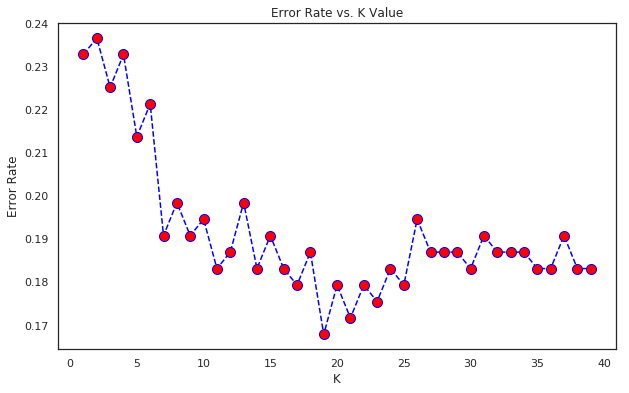

In [26]:
## K-Nearest Neighbors (K-NN)
#Choosing the K value
error_rate= []
for i in range(1,40):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print(np.mean(error_rate))

In [27]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier(n_neighbors=19, metric='minkowski', p= 2)
kn_classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = kn_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['K-Nearest Neighbors (minkowski)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [28]:
## SVM (Linear)
from sklearn.svm import SVC
svm_linear_classifier = SVC(random_state = 0, kernel = 'linear', probability= True)
svm_linear_classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = svm_linear_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [29]:
## SVM (rbf)
from sklearn.svm import SVC
svm_rbf_classifier = SVC(random_state = 0, kernel = 'rbf', probability= True)
svm_rbf_classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = svm_rbf_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [30]:
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
gb_classifier = GaussianNB()
gb_classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = gb_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Naive Bayes (Gaussian)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [31]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(X_train, y_train)

#Predicting the best set result
y_pred = dt_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [32]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'gini')
rf_classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = rf_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Gini (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [33]:
## Ada Boosting
from sklearn.ensemble import AdaBoostClassifier
ad_classifier = AdaBoostClassifier()
ad_classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = ad_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Ada Boosting', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [34]:
##Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gr_classifier = GradientBoostingClassifier()
gr_classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = gr_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Gradient Boosting', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [35]:
##Xg Boosting
from xgboost import XGBClassifier
xg_classifier = XGBClassifier()
xg_classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = xg_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Xg Boosting', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [36]:
##Ensemble Voting Classifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
voting_classifier = VotingClassifier(estimators= [('lr', lr_classifier),
                                                  ('kn', kn_classifier),
                                                  ('svc_linear', svm_linear_classifier),
                                                  ('svc_rbf', svm_rbf_classifier),
                                                  ('gb', gb_classifier),
                                                  ('dt', dt_classifier),
                                                  ('rf', rf_classifier),
                                                  ('ad', ad_classifier),
                                                  ('gr', gr_classifier),
                                                  ('xg', xg_classifier),],
voting='soft')

for clf in (lr_classifier,kn_classifier,svm_linear_classifier,svm_rbf_classifier,
            gb_classifier, dt_classifier,rf_classifier, ad_classifier, gr_classifier, xg_classifier,
            voting_classifier):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

# Predicting Test Set
y_pred = voting_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Ensemble Voting', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)   

LogisticRegression 0.8015267175572519
KNeighborsClassifier 0.8320610687022901
SVC 0.7977099236641222
SVC 0.8206106870229007
GaussianNB 0.7938931297709924
DecisionTreeClassifier 0.767175572519084
RandomForestClassifier 0.8129770992366412
AdaBoostClassifier 0.8244274809160306
GradientBoostingClassifier 0.8053435114503816
XGBClassifier 0.8091603053435115
VotingClassifier 0.8244274809160306


In [37]:
#The Best Classifier
print('The best classifier is:')
print('{}'.format(results.sort_values(by='Accuracy',ascending=False).head(5)))

The best classifier is:
                              Model  Accuracy  Precision  Recall  F1 Score
1   K-Nearest Neighbors (minkowski)  0.832061   0.878378    0.65  0.747126
7                      Ada Boosting  0.824427   0.800000    0.72  0.757895
10                  Ensemble Voting  0.824427   0.846154    0.66  0.741573
3                         SVM (RBF)  0.820611   0.827160    0.67  0.740331
6        Random Forest Gini (n=100)  0.812977   0.807229    0.67  0.732240


# Applying K-fold validation for the best classification

In [38]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=kn_classifier, X=X_train, y=y_train,cv=10)
accuracies.mean()
accuracies.std()
print(" K-Nearest Neighbors (minkowski) Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

 K-Nearest Neighbors (minkowski) Accuracy: 0.807 (+/- 0.061)


# Plotting Cumulative Accuracy Profile (CAP)

      0         1
0   1.0  1.000000
1   1.0  1.000000
2   1.0  1.000000
3   1.0  1.000000
4   1.0  1.000000
5   1.0  1.000000
6   1.0  1.000000
7   1.0  1.000000
8   1.0  0.947368
9   1.0  0.947368
10  1.0  0.947368
11  1.0  0.947368
12  1.0  0.947368
13  1.0  0.947368
14  1.0  0.947368
15  1.0  0.947368
16  1.0  0.947368
17  1.0  0.894737
18  1.0  0.894737
19  1.0  0.894737


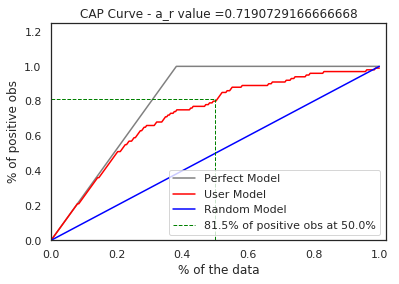

In [39]:
y_pred_proba = kn_classifier.predict_proba(X=X_test)
import matplotlib.pyplot as plt
from scipy import integrate
def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    
    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(level = y_cap_df_s.index.names, drop=True)
    
    print(y_cap_df_s.head(20))
    
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    
    percent = 0.5
    row_index = int(np.trunc(num_count * percent))
    
    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
    
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='User Model')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()
    
capcurve(y_test,y_pred_proba[:,1])

# Permutation Importance

In [40]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(kn_classifier, random_state=0).fit(X_test,y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.


Weight,Feature
0.1947 ± 0.0255,sex_female
0.0328 ± 0.0249,pclass
0.0229 ± 0.0145,fare
0.0221 ± 0.0089,sibling
0.0145 ± 0.0122,embarked_Cherbourg
0.0130 ± 0.0197,age
0.0099 ± 0.0104,embarked_Queenstown
0.0092 ± 0.0157,family
0.0084 ± 0.0163,parents
